# ML Data Cleaning and Feature Selection About Dataset

Name: Jhalak Surve

**Background**

Flight delays are significant concerns in aviation industries, leading to revenue loss, fuel loss, and customer dissatisfaction. It creates fear among passengers taking a connecting flight, whereby the delay from the first flight could potentially cause them to miss the subsequent flight. Therefore, this scenario is a factor of motivation for this study. With a reliable method to predict flight delays, the event mentioned in the previous context could either be prevented or better managed.



**About the dataset**

**Target Variable:**

**Delay**: Will the flight get delayed or not

**Predictor Variables**

**Airline**: Which Airline the flight is from

**Flight**: Defines the flight number

**AirportFrom**: Source Airport

**AirportTo**: Destination Airport

**DayOfWeek**: Which day of the week it is

**Time**: Time of Departure

**Length**: Duration of the flight


**Importing the necessary libraries**

In [217]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [218]:
# Loading the dataset from the github repository

url = 'https://raw.githubusercontent.com/jhalak1509/Datasets/main/Airline_Delay_Dataset.csv'

df = pd.read_csv(url)

df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [219]:
# Dropping the id column

df = df.drop(['id'], axis = 1)
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


# Data Preprocessing and Analysis


In [195]:
df.shape

(539383, 8)

In [196]:
# Basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   Flight       539383 non-null  int64 
 2   AirportFrom  539383 non-null  object
 3   AirportTo    539383 non-null  object
 4   DayOfWeek    539383 non-null  int64 
 5   Time         539383 non-null  int64 
 6   Length       539383 non-null  int64 
 7   Delay        539383 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 32.9+ MB


# **What are the data types? (Only numeric and categorical)**

From the above output, we can see that there are 5 numerical and 3 categorical variables

# Are there missing values?

In [197]:
# Checking for missing values

missing_values = df.isnull().sum()
missing_values

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data


In [220]:
# Splitting our dataset into two dataframes - 1. Predictor Variables 2. Target Variable
y = df['Delay']
x = df.drop('Delay', axis = 1)
df_total = df

# What are the likely distributions of the numeric variables?

<Figure size 800x500 with 0 Axes>

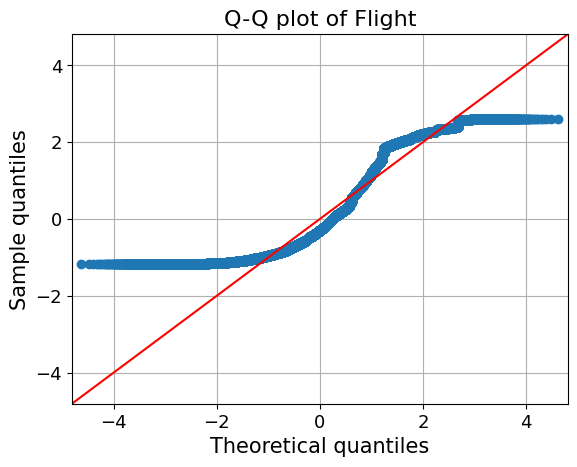

<Figure size 800x500 with 0 Axes>

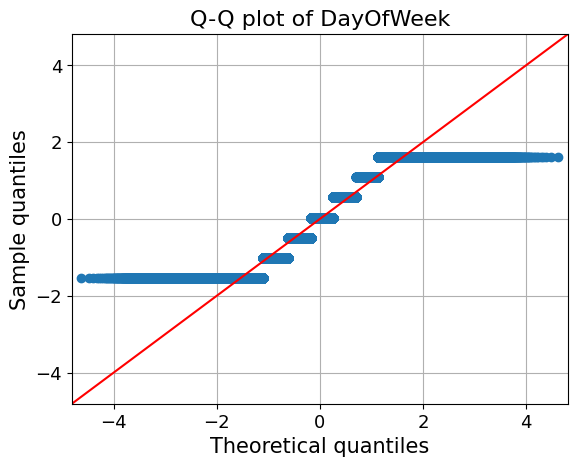

<Figure size 800x500 with 0 Axes>

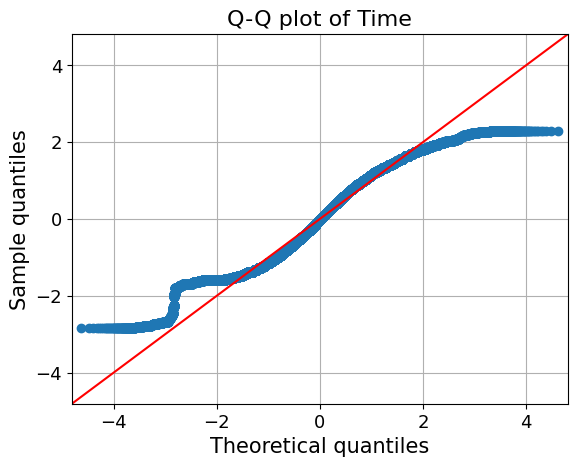

<Figure size 800x500 with 0 Axes>

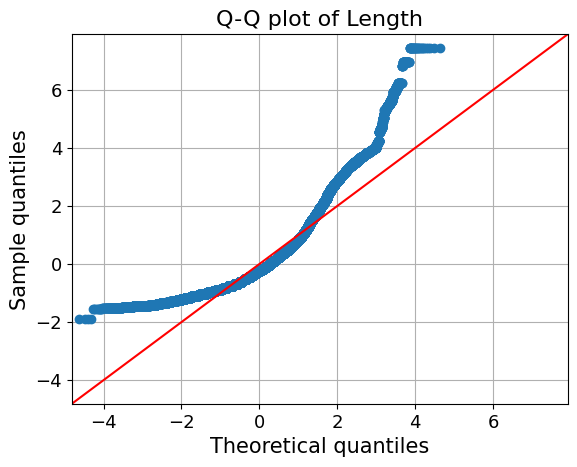

In [221]:
from re import X
#checking the distribution of numerical independent variables
from statsmodels.graphics.gofplots import qqplot
x_norm=x[['Flight', 'DayOfWeek',
       'Time', 'Length']]
for c in x_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(x_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

Except for the independent variable, i.e., "Length", the other three numerical indepent variables roughly follow the normal distribution with some outliers in the front and the end.


For each categorical independent variable, calculate the number of each category and have an overview of its distribution.

1. Airline

In [200]:
different_airline=x["Airline"].unique()
num_of_different_airline=x["Airline"].nunique()
print("Different airline name: ",str(different_airline))
print("Total number of airlines are: ",num_of_different_airline)

Different airline name:  ['CO' 'US' 'AA' 'AS' 'DL' 'B6' 'HA' 'OO' '9E' 'OH' 'EV' 'XE' 'YV' 'UA'
 'MQ' 'FL' 'F9' 'WN']
Total number of airlines are:  18


In [201]:
x['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

2. Source Airport

In [104]:
x['AirportFrom'].value_counts()


ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64

3. Destination Airport

In [105]:
x['AirportTo'].value_counts()


ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportTo, Length: 293, dtype: int64

# Do the ranges of the predictor variables make sense?

In [222]:
# Encoding the categorical variables

def label_encoding(categories):
    #To perform mapping of categorical features
    categories = list(set(list(categories.values)))
    mapping = {}
    for idx in range(len(categories)):
        mapping[categories[idx]] = idx
    return mapping


In [223]:
x['Airline'] = x['Airline'].map(label_encoding(df['Airline']))

In [224]:
x['AirportFrom'] = x['AirportFrom'].map(label_encoding(df['AirportFrom']))

In [225]:
x['AirportTo'] = x['AirportTo'].map(label_encoding(df['AirportTo']))

In [226]:
x.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
0,16,269,46,102,3,15,205
1,1,1558,131,200,3,15,222
2,9,2400,248,104,3,20,165
3,9,2466,46,104,3,20,195
4,11,108,242,100,3,30,202


<Axes: >

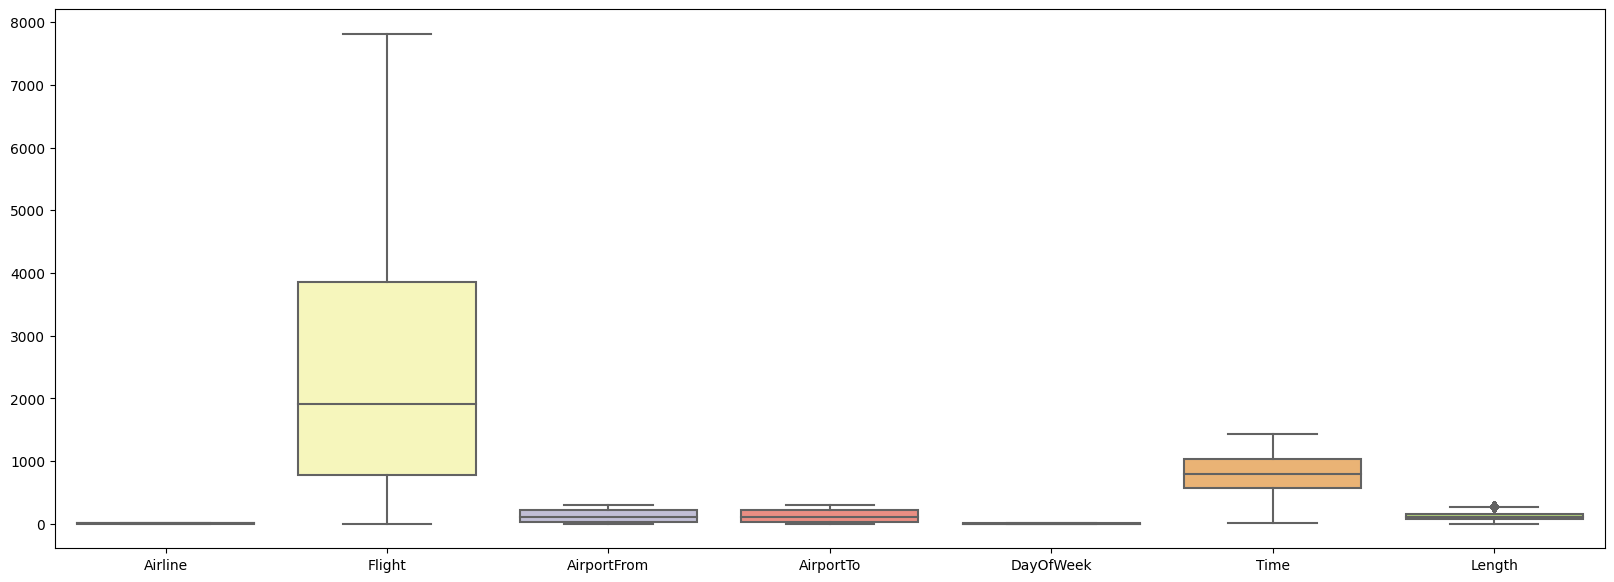

In [209]:
#Checking the range of the predictor variables
plt.figure(figsize=(20,7))
sns.boxplot(data=x, palette="Set3")

*   The range of 'Flight' is way too high as compared to the other variables that is why we are not able to visualize the ranges for other predictor variables.
*  We will plot the charts separately to get the ranges of each one of them





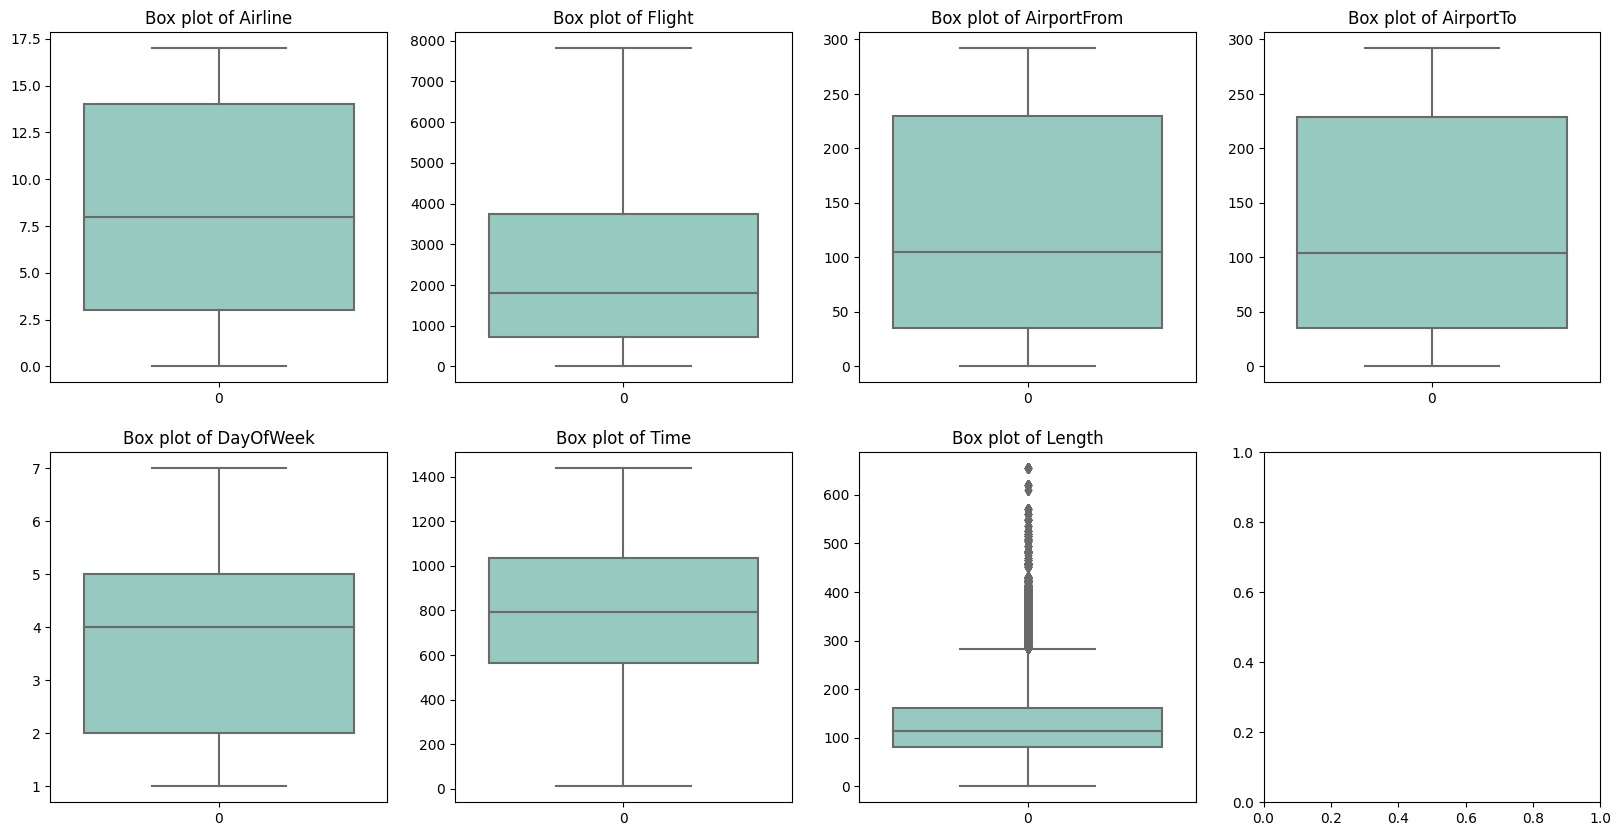

In [112]:
#Checking the Ranges of the predictor variables individually
cols = list(x.columns)
f, axs = plt.subplots(2,4,figsize=(20,10))
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title('Box plot of '+ cols[i])
  sns.boxplot(x[cols[i]], palette = 'Set3')
plt.show()

As we know already and we can see again, that there are outliers in 'Length'

**Normalizing the dataset**

In [210]:
# list of numerical columns which require normalization
num_cols= x.columns

# Importing required library from sklearn for normalization
from sklearn import preprocessing
feature_to_scale = num_cols

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x[feature_to_scale] = min_max_scaler.fit_transform(x[feature_to_scale])

In [211]:
# checking the predictor variables after normalization
x.describe()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
count,513733.000000,513733.000000,513733.000000,513733.000000,513733.000000,513733.000000,513733.000000
mean,0.504073,0.321400,0.439377,0.438365,0.487755,0.553731,0.430806
std,0.318211,0.265629,0.317799,0.318967,0.319051,0.193562,0.188352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.176471,0.098426,0.119863,0.119863,0.166667,0.391882,0.282686
50%,0.470588,0.244976,0.359589,0.356164,0.500000,0.549335,0.392226
75%,0.823529,0.494304,0.746575,0.750000,0.666667,0.713786,0.547703
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that the variables are now in the range of 0 to 1


Text(0.5, 1.0, 'Box plot of predictor variables of the dataset')

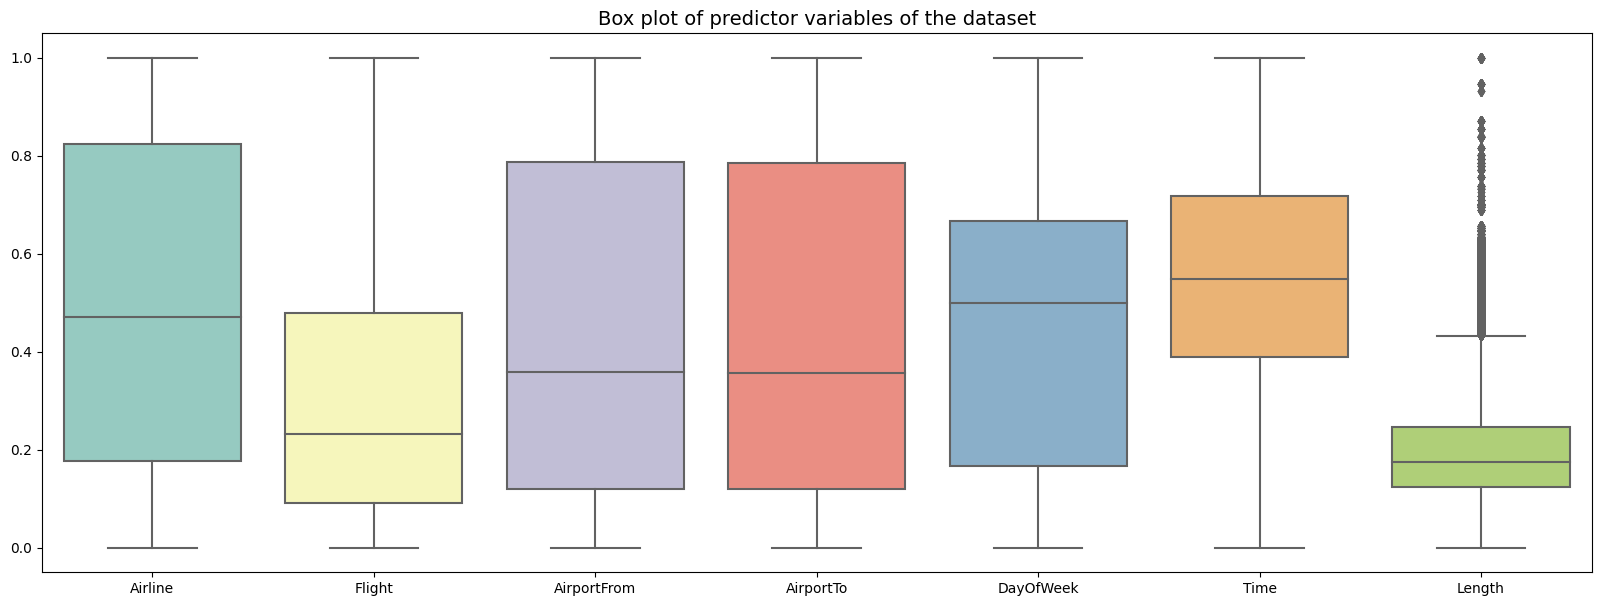

In [115]:
#Checking the Ranges of the predictor variables together after normalization
plt.figure(figsize=(20,7))
sns.boxplot(data=x, palette="Set3")
plt.title("Box plot of predictor variables of the dataset", size=14)

# Are the predictor variables independent of all other predictor variables?

In [116]:
x.corr()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
Airline,1.000000,-0.256754,-0.065586,-0.065986,-0.003534,-0.009855,0.061575
Flight,-0.256754,1.000000,0.005502,0.006115,0.000416,-0.005750,-0.341481
AirportFrom,-0.065586,0.005502,1.000000,-0.025400,0.003849,-0.028701,0.048232
AirportTo,-0.065986,0.006115,-0.025400,1.000000,0.003904,0.038717,0.014517
DayOfWeek,-0.003534,0.000416,0.003849,0.003904,1.000000,0.001273,0.013397
Time,-0.009855,-0.005750,-0.028701,0.038717,0.001273,1.000000,-0.020612
Length,0.061575,-0.341481,0.048232,0.014517,0.013397,-0.020612,1.000000


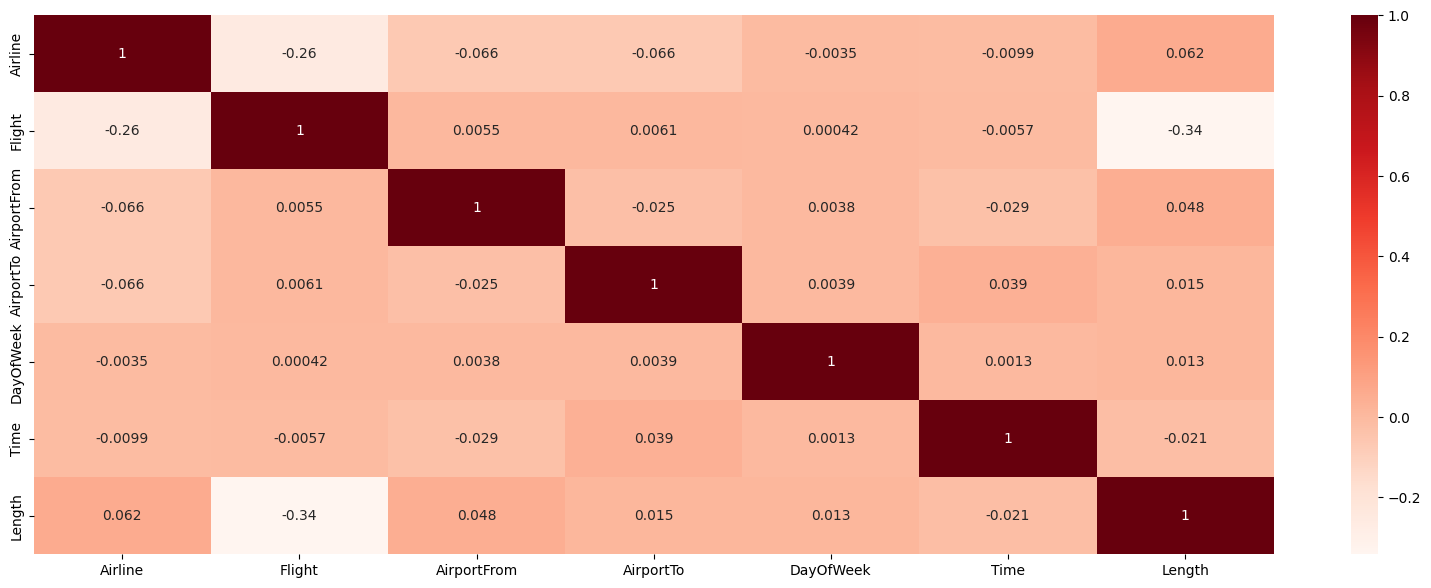

In [119]:
plt.figure(figsize=(20,7))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

*   It is very clear from the heatmap that most of the variables are not dependent on each other
*   Degree of collinearity is significantly less that 0.1 for most variables







Creating a Train - Test split for our model training and predictions

In [120]:
#Spliting data into Training 80% and Test set 20%

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Do the training and test sets have the same data?

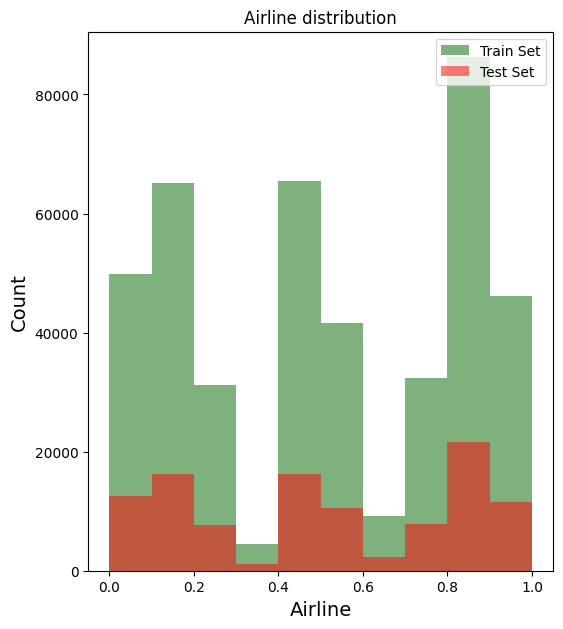

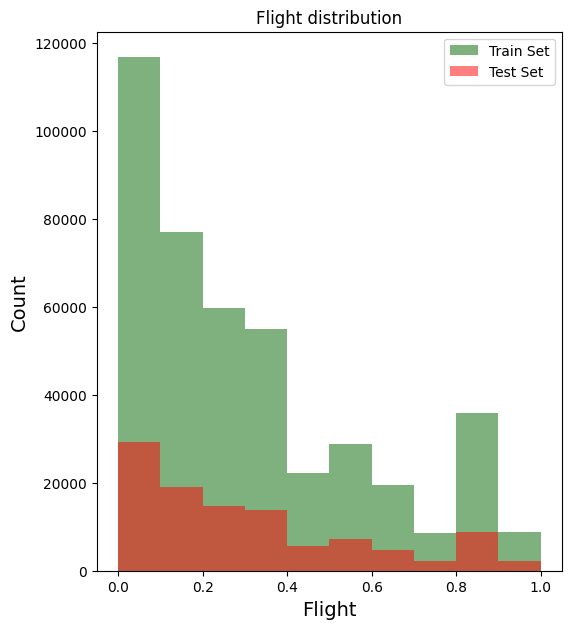

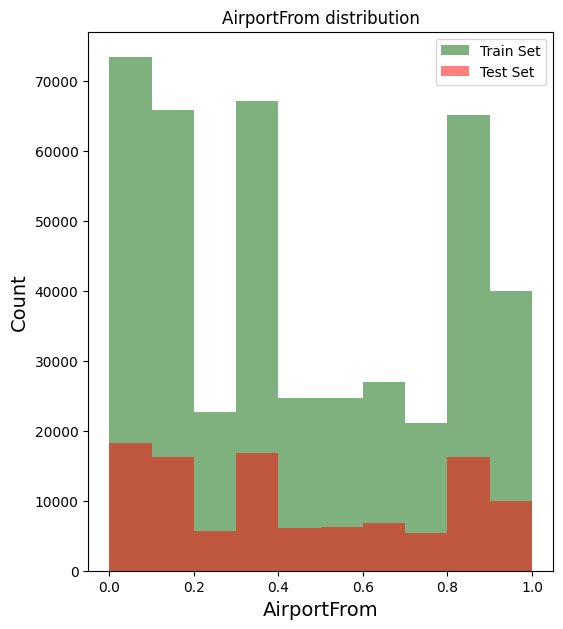

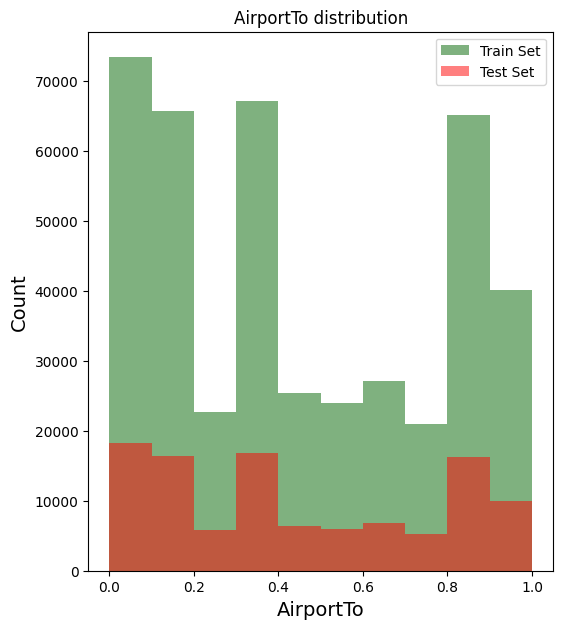

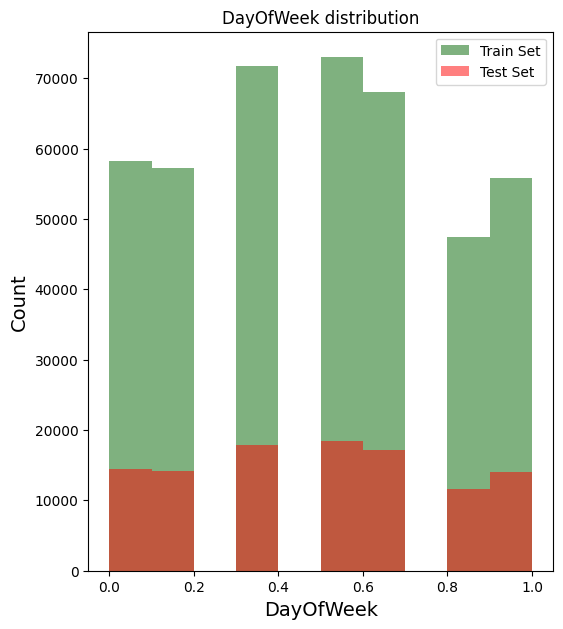

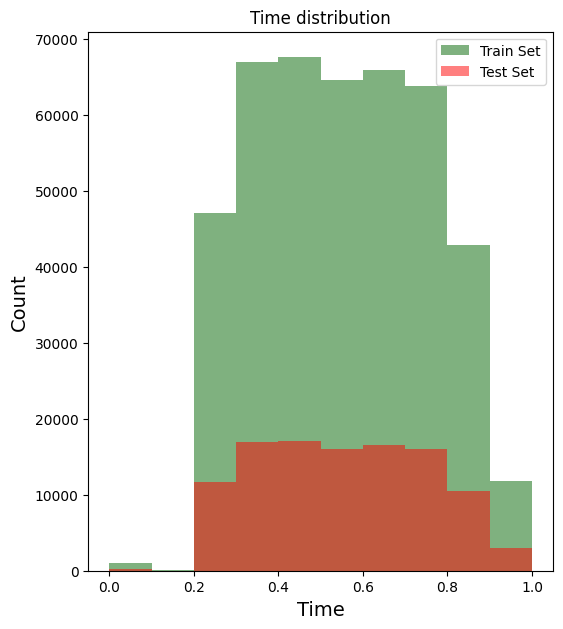

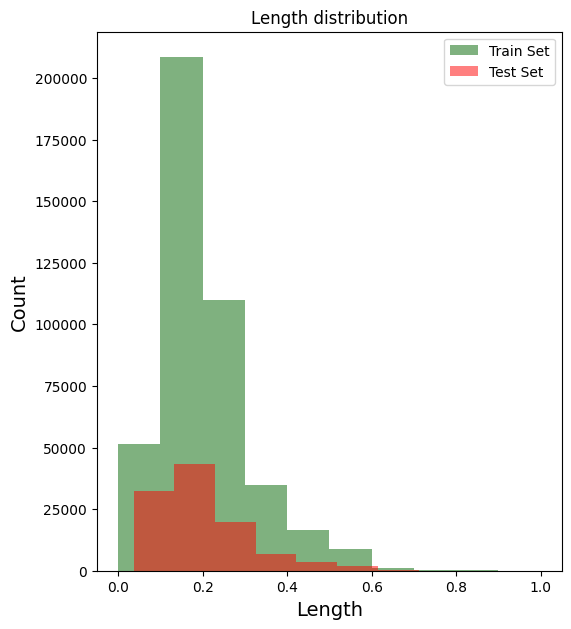

In [121]:
# Looking the data for test and training set
X_test_plot = X_test
X_train_plot = X_train

#Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(6,7))
    plt.hist(X_train_plot[c], bins=10, alpha=0.5, label="Train Set", color="darkgreen")
    plt.hist(X_test_plot[c], bins=10, alpha=0.5, label="Test Set", color ="red")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(c))
    plt.show()



As observed from the plots above, the ratio of 80%-20% for train-test split appears to be distributed correctly for all the variables.

# Which predictor variables are the most useful to predict a target?

**Method 1 : Using Random Forest Classifier**

Text(0.5, 1.0, 'Feature Importance ')

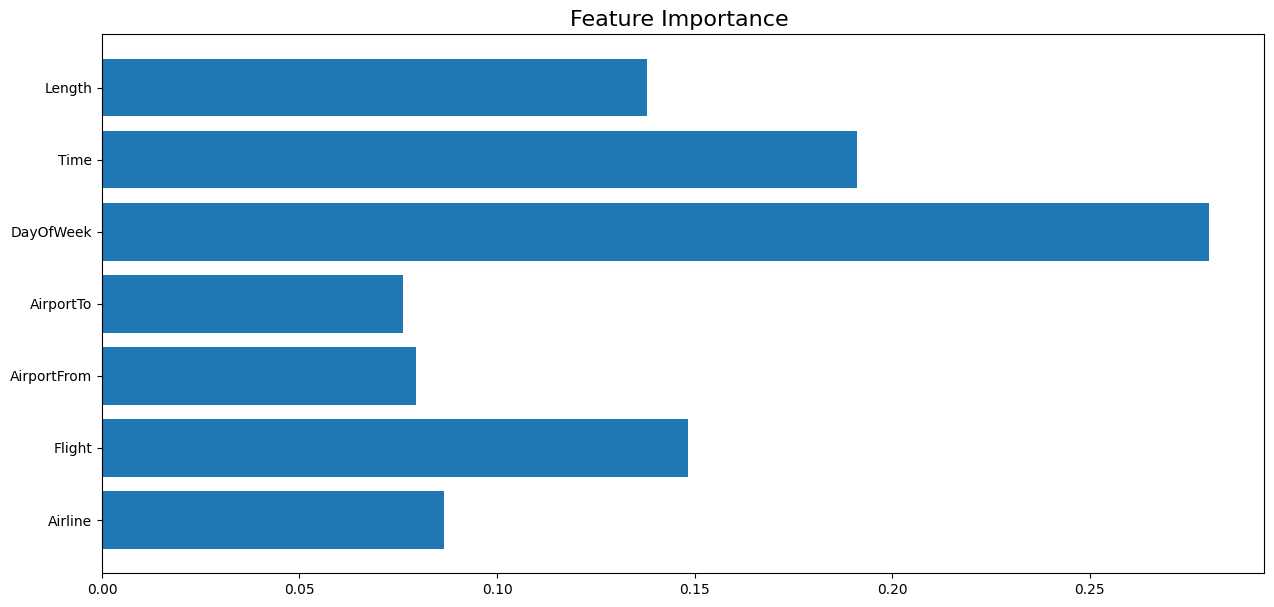

In [126]:
model_RandomForest = RandomForestClassifier()
model_RandomForest.fit(X_train, y_train)
cols=X_train.columns
plt.figure(figsize=(15, 7))
plt.barh(cols,model_RandomForest.feature_importances_)
plt.title('Feature Importance ', size=16)

From the above plot, we can see that the following predictor variables are useful in predicting the target - Day of Week, Time of Departure, Duration of the flight, Fight Number

**Method 2: Using Ordinary Least Squares(OLS)**

In [127]:
import statsmodels.api as sm

model_OLS = sm.OLS(y_train, X_train).fit()

model_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Delay   R-squared (uncentered):                   0.462
Model:                            OLS   Adj. R-squared (uncentered):              0.462
Method:                 Least Squares   F-statistic:                          5.298e+04
Date:                Mon, 02 Oct 2023   Prob (F-statistic):                        0.00
Time:                        23:33:31   Log-Likelihood:                     -3.0390e+05
No. Observations:              431506   AIC:                                  6.078e+05
Df Residuals:                  431499   BIC:                                  6.079e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Airline         0.1876      0.002     84.710      0.000       0.183       0.192
Flight          0.0472      0.003     17.193      0.000       0.042       0.053
AirportFrom    -0.0118      0.002     -5.289      0.000      -0.016      -0.007
AirportTo       0.0106      0.002      4.717      0.000       0.006       0.015
DayOfWeek      -0.0104      0.002     -4.645      0.000      -0.015      -0.006
Time            0.4836      0.003    151.966      0.000       0.477       0.490
Length          0.3311      0.007     50.329      0.000       0.318       0.344
==============================================================================
Omnibus:                  1766563.715   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57604.367
Skew:                           0.193   Prob(JB):                         0.00
Kurtosis:                       1.252   Cond. No.                         10.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations -
*   The "Time" variable has the highest coefficient (0.4836), indicating the strongest positive relationship with "Delay."
*   The "Length" variable also has a substantial positive coefficient (0.3311), suggesting a significant positive relationship with "Delay."

These two are the most useful features in predicting the target



**Method 3: Using Logistic Regression**

In [129]:
import statsmodels.api as sd
model_Logistic = sd.Logit(y_train,X_train).fit()
print(model_Logistic.summary())


Optimization terminated successfully.
         Current function value: 0.677293
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  Delay   No. Observations:               431506
Model:                          Logit   Df Residuals:                   431499
Method:                           MLE   Df Model:                            6
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.01434
Time:                        23:43:49   Log-Likelihood:            -2.9226e+05
converged:                       True   LL-Null:                   -2.9651e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Airline         0.2171      0.009     23.634      0.000       0.199       0.235
Flight         -0.5612    

*   "Time" has the largest positive coefficient (0.8658), suggesting it has the most significant positive impact on the log-odds of "Delay."
*   "Flight" has a large negative coefficient (-0.5612), indicating a significant negative impact on the log-odds of "Delay."



In [131]:
#Understanding the important features
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model_RandomForest, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0573 ± 0.0028,Airline
0.0095 ± 0.0016,Time
-0.0069 ± 0.0021,DayOfWeek
-0.0115 ± 0.0014,Length
-0.0141 ± 0.0005,Flight
-0.0162 ± 0.0015,AirportFrom
-0.0213 ± 0.0012,AirportTo


# Creating some baseline models

**Logistic Regression**

In [145]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

lr_pred= lr.predict(X_test)
print('--Phase-1--')
mae1 = mean_absolute_error(y_test, lr_pred)
print('MAE: %f'% mae1)
rmse1= np.sqrt(mean_squared_error(y_test, lr_pred))
print('RMSE: %f'% rmse1)
r21 = r2_score(y_test, lr_pred)
print('R2: %f' % r21)

--Phase-1--
MAE: 0.414908
RMSE: 0.644133
R2: -0.679184


<ipython-input-146-aa7f3493601f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-146-aa7f3493601f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lr_pred, hist=False, color="b", label="Fitted Values" , 

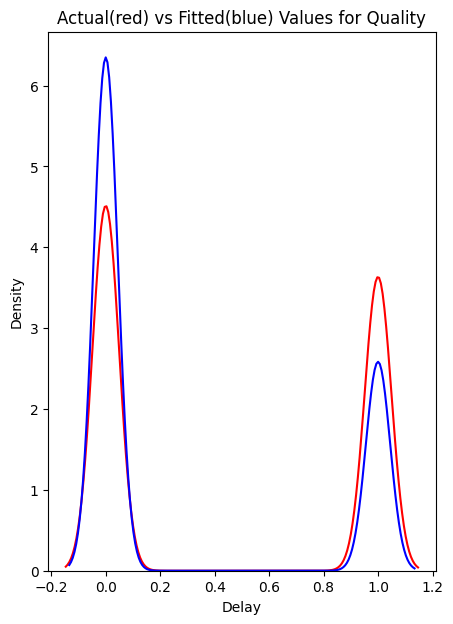

In [146]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(lr_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual(red) vs Fitted(blue) Values for Quality')


plt.show()
plt.close()

**Random Forest**

In [148]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print('--Phase-1--')
mae2 = mean_absolute_error(y_test, rf_pred)
print('MAE: %f'% mae2)
rmse2 = np.sqrt(mean_squared_error(y_test, rf_pred))
print('RMSE: %f'% rmse2 )
r22 = r2_score(y_test, rf_pred)
print('R2: %f' % r22)

--Phase-1--
MAE: 0.380730
RMSE: 0.617033
R2: -0.540862


<ipython-input-150-51262ef6abba>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-150-51262ef6abba>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , 

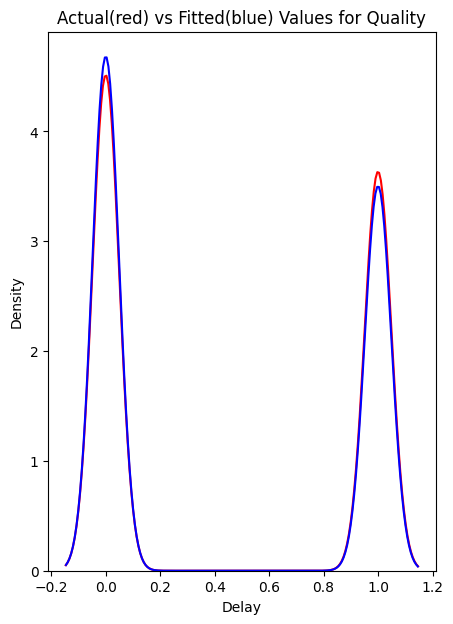

In [150]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual(red) vs Fitted(blue) Values for Quality')


plt.show()
plt.close()

**KNN Classifier**

In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [152]:
knn_pred = knn.predict(X_test)

print('--Phase-1--')
mae3 = mean_absolute_error(y_test, knn_pred)
print('MAE: %f'% mae3)
rmse3 = np.sqrt(mean_squared_error(y_test, knn_pred))
print('RMSE: %f'% rmse3)
r23 = r2_score(y_test, knn_pred)
print('R2: %f' % r23)

--Phase-1--
MAE: 0.396238
RMSE: 0.629475
R2: -0.603627


<ipython-input-153-cd8ae812c1f2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-153-cd8ae812c1f2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(knn_pred, hist=False, color="b", label="Fitted Values" ,

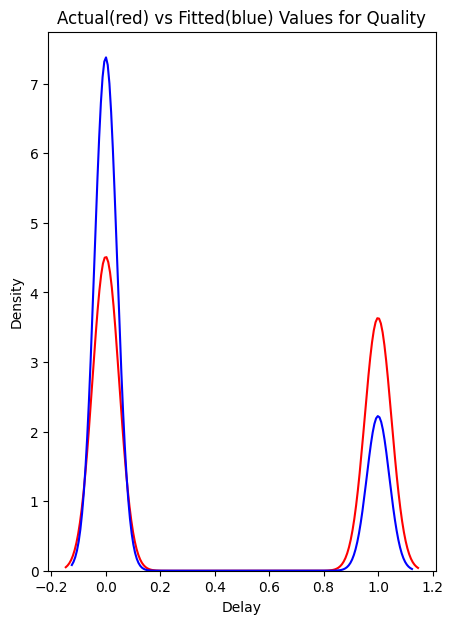

In [153]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(knn_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual(red) vs Fitted(blue) Values for Quality')


plt.show()
plt.close()

In [136]:
# Splitting Train-set and Validation-set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=41)

**Calculating accuracy and confusion matrix**

In [137]:
# Formula to get accuracy
def get_accuracy(y_true, y_preds):
    # Getting score of confusion matrix
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_true, y_preds).ravel()
    # Calculating accuracy
    accuracy = (true_positive + true_negative)/(true_negative + false_positive + false_negative + true_positive)
    return accuracy

**Evaluation of accuracy on validation dataset**

In [138]:
models = [lr, rf, knn]
acc = []
for model in models:
    preds_val = model.predict(X_val)
    accuracy = get_accuracy(y_val, preds_val)
    acc.append(accuracy)

In [139]:
model_name = ['Logistic Regression', 'Random Forest', 'KNN']
accuracy = dict(zip(model_name, acc))

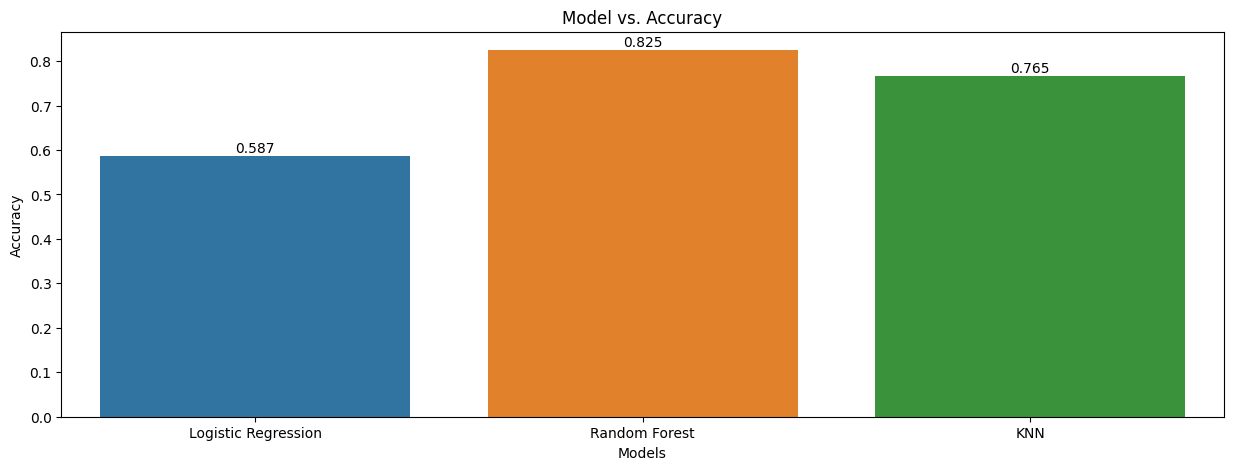

In [140]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = list(accuracy.keys()), y = list(accuracy.values()))
for p, value in zip(ax.patches, list(accuracy.values())):
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, round(value, 3), ha="center")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model vs. Accuracy")
plt.show()

From the above plot, we can see that Random Forest is the most accurate in this case

**Outlier Treatment**

As we know, we have outliers just for the feature 'Length'

In [227]:
Q1_Length,Q3_Length = np.percentile(df['Length'] , [25,75])
IQR_Length = Q3_Length - Q1_Length

U_Length = Q3_Length + 1.5*IQR_Length

L_Length = Q1_Length - 1.5*IQR_Length

print(U_Length)
print(L_Length)

df.drop(x[x['Length'] < L_Length].index, inplace=True)
df.drop(x[x['Length'] > U_Length].index, inplace=True)


283.5
-40.5


In [228]:
df['Airline'] = df['Airline'].map(label_encoding(df['Airline']))
df['AirportFrom'] = df['AirportFrom'].map(label_encoding(df['AirportFrom']))
df['AirportTo'] = df['AirportTo'].map(label_encoding(df['AirportTo']))

In [229]:
df.describe()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
count,513733.000000,513733.000000,513733.000000,513733.000000,513733.000000,513733.000000,513733.000000,513733.000000
mean,8.569239,2512.101265,127.950128,127.652876,3.926530,801.281518,121.918140,0.444131
std,5.409586,2075.356341,92.378115,92.718402,1.914308,276.600049,53.303621,0.496869
min,0.000000,1.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000
25%,3.000000,770.000000,35.000000,35.000000,2.000000,570.000000,80.000000,0.000000
50%,8.000000,1915.000000,105.000000,104.000000,4.000000,795.000000,111.000000,0.000000
75%,14.000000,3863.000000,217.000000,218.000000,5.000000,1030.000000,155.000000,1.000000
max,17.000000,7814.000000,291.000000,291.000000,7.000000,1439.000000,283.000000,1.000000


In [230]:
cleaned_x, cleaned_y = df.iloc[:,:7], df.iloc[:,-1]
cleaned_x.shape

(513733, 7)

In [231]:
scaler = StandardScaler()
cleaned_x = scaler.fit_transform(cleaned_x)

In [233]:
#Splitting the dataset after outlier treatment into Train and Test sets at 80-20 proportion
Xclean_train, Xclean_test, yclean_train, yclean_test = train_test_split(cleaned_x, cleaned_y, test_size=0.2,random_state=42)


# Remove outliers and keep outliers (does if have an effect of the final predictive model)?

**Logistic Regression**

In [234]:
lr.fit(Xclean_train, yclean_train)

lrclean_pred= lr.predict(Xclean_test)

print('--Phase-1--')
print('MAE: %f'% mae1)
print('RMSE: %f'% rmse1)
print('R2: %f' % r21)

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(yclean_test, lrclean_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(yclean_test, lrclean_pred)))
print('R2: %f' % r2_score(yclean_test, lrclean_pred))

--Phase-1--
MAE: 0.414908
RMSE: 0.644133
R2: -0.679184
--Phase-2--
MAE: 0.409774
RMSE: 0.640136
R2: -0.659687


**Random Forest**

In [235]:
rf.fit(Xclean_train, yclean_train)
rfclean_pred = rf.predict(Xclean_test)

print('--Phase-1--')
print('MAE: %f'% mae2)
print('RMSE: %f'% rmse2)
print('R2: %f' % r22)

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(yclean_test, rfclean_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(yclean_test, rfclean_pred)))
print('R2: %f' % r2_score(yclean_test, rfclean_pred))

--Phase-1--
MAE: 0.380730
RMSE: 0.617033
R2: -0.540862
--Phase-2--
MAE: 0.378279
RMSE: 0.615044
R2: -0.532125


**KNN**

In [236]:
knn.fit(Xclean_train, yclean_train)
knnclean_pred = knn.predict(Xclean_test)

print('--Phase-1--')
print('MAE: %f'% mae3)
print('RMSE: %f'% rmse3)
print('R2: %f' % r23)

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(yclean_test, knnclean_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(yclean_test, knnclean_pred)))
print('R2: %f' % r2_score(yclean_test, knnclean_pred))

--Phase-1--
MAE: 0.396238
RMSE: 0.629475
R2: -0.603627
--Phase-2--
MAE: 0.389150
RMSE: 0.623819
R2: -0.576157


As we can see above, there's not a lot of difference after removing outliers. The results for both the phases are approximately the same

# Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?


In [260]:
# Defined a function to calculate the MSE by imputing with mean and median
def get_MSE_by_imputing_missing_values(temp, feature, fraction_to_miss):
    # Creating one more feature to remove 1% values from it.
    temp[f'{feature}_imputed'] = df[feature]

    # Imputing 10% of Feature_imputed with Null values
    temp.loc[temp.sample(frac=fraction_to_miss).index, feature] = np.NaN
    print(f"Missing values count before imputting with Mean: {temp[feature].isnull().sum()}")

    print("\n----------Imputing with Mean ----------")
    # Imputing with Mean.
    temp[feature] = temp[feature].fillna(temp[feature].mean())
    print(f"Missing values count After imputting with Mean: {temp[feature].isnull().sum()}")
    print(f"Mean Squared Error by Imputing with Mean of same Feature: {(mean_squared_error(temp[feature],temp[f'{feature}_imputed'])).round(4)}")

    # Imputing Feature_imputed with Null values
    temp.loc[temp.sample(frac=fraction_to_miss).index, feature] = np.NaN
    print(f"\nMissing values count before imputting with Median: {temp[feature].isnull().sum()}")

    print("----------Imputing with Median ----------")
    # Imputing with Median.
    temp[feature] = temp[feature].fillna(temp[feature].median())
    print(f"Missing values count: {temp[feature].isnull().sum()}")
    print(f"Mean Squared Error by Imputing with Median of same Feature: {(mean_squared_error(temp[feature],temp[f'{feature}_imputed'])).round(4)}")



**1%**

In [261]:
temp = df.copy()

# lets say I want to remove values from feature and impute it using few methods
feature = 'Airline'
fraction_to_miss = 0.01

get_MSE_by_imputing_missing_values(temp, feature, fraction_to_miss)



Missing values count before imputting with Mean: 5137

----------Imputing with Mean ----------
Missing values count After imputting with Mean: 0
Mean Squared Error by Imputing with Mean of same Feature: 0.283

Missing values count before imputting with Median: 5137
----------Imputing with Median ----------
Missing values count: 0
Mean Squared Error by Imputing with Median of same Feature: 0.5706


**5%**

In [251]:
temp = df.copy()

# lets say I want to remove values from feature and impute it using few methods
feature = 'Airline'
fraction_to_miss = 0.05

get_MSE_by_imputing_missing_values(temp, feature, fraction_to_miss)

Missing values count before imputting with Mean: 25687

----------Imputing with Mean ----------
Missing values count After imputting with Mean: 0
Mean Squared Error by Imputing with Mean of same Feature: 1.4585

Missing values count before imputting with Median: 25687
----------Imputing with Median ----------
Missing values count: 0
Mean Squared Error by Imputing with Median of same Feature: 2.8579


**10%**

In [252]:
temp = df.copy()

# lets say I want to remove values from feature and impute it using few methods
feature = 'Airline'
fraction_to_miss = 0.10

get_MSE_by_imputing_missing_values(temp, feature, fraction_to_miss)

Missing values count before imputting with Mean: 51373

----------Imputing with Mean ----------
Missing values count After imputting with Mean: 0
Mean Squared Error by Imputing with Mean of same Feature: 2.9324

Missing values count before imputting with Median: 51373
----------Imputing with Median ----------
Missing values count: 0
Mean Squared Error by Imputing with Median of same Feature: 5.5599


Imputing the missing data using Median has double the error of Imputing the missing data using Mean irrespective of the size of data imputed.

# Citations/ References

1. Many techniques used in this notebook have been adopted from the following github repositories



*  Owner - AI Skunkworks - Link - https://github.com/aiskunks/Skunks_Skool
*   Author name - Prof Nik Bear Brown
Link - https://github.com/nikbearbrown/

2. I took the reference code for creating the function for the imputation task from the above listed github repository as well

3. Chatgpt also helped with understanding some of the questions

4. The methods and parameters of the models amd code corrections have been adapted from stackoverflow

Link - https://stackoverflow.com








# Licensing

Copyright 2023

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.